# Dropout Layers

2023-10-11 21:21:15.415487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


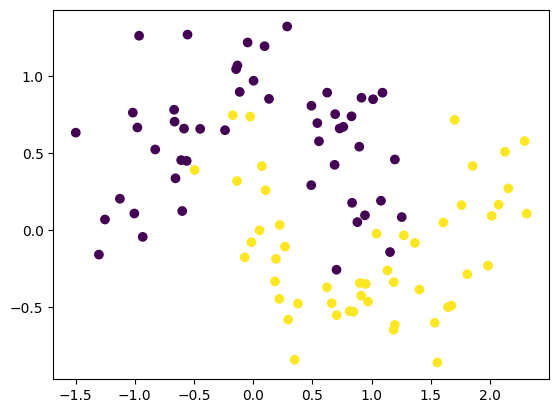

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 14s 1ms/step


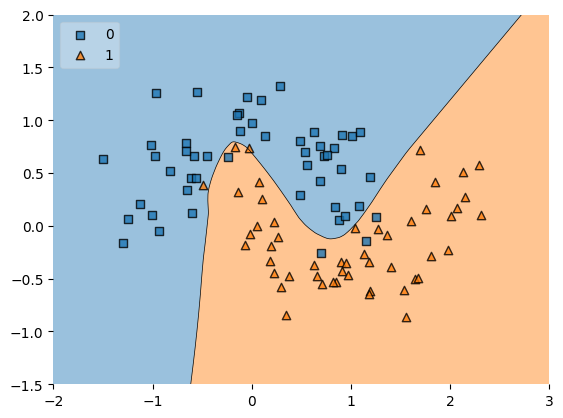

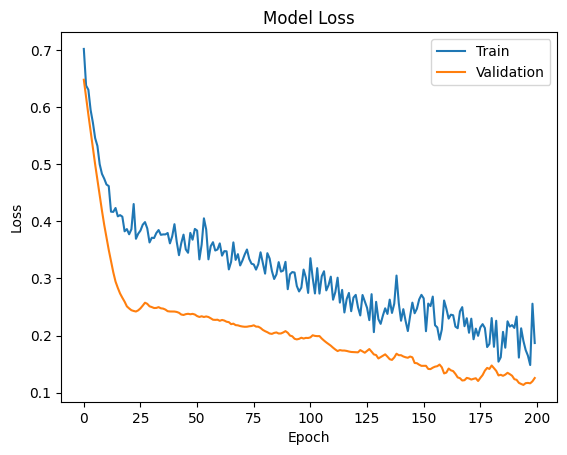

In [1]:
# import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 


x, y = make_moons(100, noise = 0.25, random_state = 2)

# Visualize the data 
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

# Build the model with dropout layers
model = Sequential()

model.add(Dense(128, input_dim = 2, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

adam = Adam(lr = 0.01)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(x, y, validation_split = 0.2, epochs = 200, batch_size = 20, verbose = 0)

# Visualize the decision boundary
plot_decision_regions(x, y.astype('int'), clf = model, legend = 2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()



In [2]:
# Calculate the accuracy
acc = history.history['accuracy'][-1] * 100
acc

91.25000238418579